In [ ]:
#Data cleaning and pre-processing

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv') #Reading from defined path of csv file.

df['User_Score'] = df['User_Score'].replace('tbd', None)   #Replacing tbd in user score with null


platform = df[['Platform', 'Critic_Score']]


df_curr = df[(df['Platform'] == '3DS') | (df['Platform'] == 'DS') | (df['Platform'] == 'GBA') | (df['Platform'] == 'GC') | (df['Platform'] == 'PC') | (df['Platform'] == 'PS') | (df['Platform'] == 'PS2') | (df['Platform'] == 'PS3') | (df['Platform'] == 'PS4') | (df['Platform'] == 'PSP') | (df['Platform'] == 'PSV') | (df['Platform'] == 'Wii') | (df['Platform'] == 'WiiU') | (df['Platform'] == 'X360') | (df['Platform'] == 'XB') | (df['Platform'] == 'XOne')]

platform = df_curr[['Platform', 'Critic_Score']]

df = df_curr[df_curr['Critic_Score'].notna()]



df = df.drop(['Name', 'Publisher', 'Developer', 'User_Count','JP_Sales','NA_Sales','EU_Sales'], axis = 1)  #Removing useless columns


df['Year_of_Release'] = df['Year_of_Release'].fillna(df['Year_of_Release'].median())
df['Critic_Count'] = df['Critic_Count'].fillna(df['Critic_Count'].median())
df['User_Score'] = df['User_Score'].astype(float)
df['User_Score'] = df['User_Score'].fillna(df['User_Score'].median())

df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])


data = pd.get_dummies(data=df.copy(), columns=['Platform', 'Genre', 'Rating'])  #To do get dummies


Ycol = ["Global_Sales"]
X_Col = list(data.columns)
X_Col.remove(Ycol[0])

X = data[X_Col]
Y = data[Ycol]



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=12)


Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)



minmaxscaler =  MinMaxScaler()
minmaxscaler.fit(X_train)

X_train_final = minmaxscaler.transform(X_train) 
X_test_final = minmaxscaler.transform(X_test)



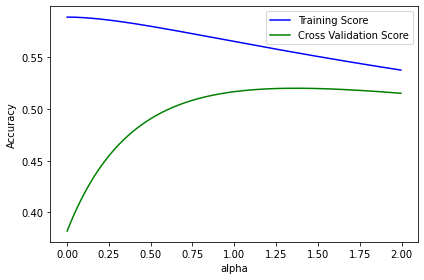

In [ ]:
#validation curve for Ridge Regression

parameter_range=np.arange(0.001,2,0.005)
train_score, test_score=validation_curve(Ridge(), X_train_final,Y_train, param_name="alpha", n_jobs=-1,
      param_range=parameter_range, cv=6, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
#Linear Regression (RIDGE)


regr = Ridge(alpha=0.05)
regr.fit(X_train_final, Y_train)
y_pred=regr.predict(X_test_final)
print('R2 Score for RIDGE Regression : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME for Ridge Regression: ',rmse)







R2 Score for RIDGE Regression :  0.6239497530545164
RSME for Ridge Regression:  0.27163474574396407


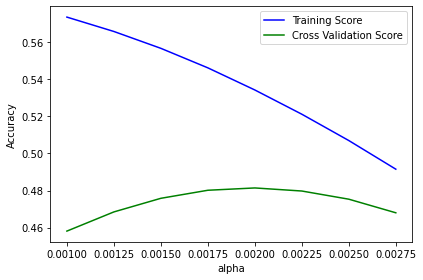

In [ ]:
#validation curve for Lasso Regression

parameter_range=np.arange(0.001,0.003,0.00025)
train_score, test_score=validation_curve(Lasso(), X_train_final,Y_train, param_name="alpha", n_jobs=-1,
      param_range=parameter_range, cv=6, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()



In [ ]:
#Linear Regression(LASSO)


regr = Lasso(alpha=0.0008)
regr.fit(X_train_final, Y_train)
Y_pred=regr.predict(X_test_final)
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)

R2 Score :  0.6239497530545164
RSME:  0.27163474574396407


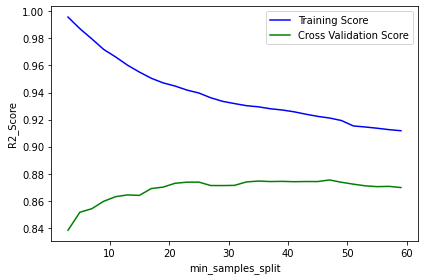

In [ ]:
#Validation Curve for Decision Tree regression (hyperparameter min_sample_split)


parameter_range=np.arange(1,60,2)
train_score, test_score=validation_curve(DecisionTreeRegressor(), X_train_final,np.ravel(Y_train), param_name="min_samples_split", n_jobs=-1,
      param_range=parameter_range, cv=5, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("R2_Score")
plt.xlabel("min_samples_split")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()




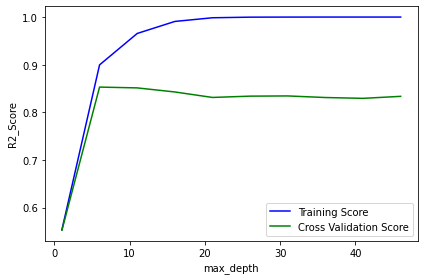

In [ ]:
#Validation Curve for Decision Tree regression (hyperparameter max_depth)
parameter_range=np.arange(1,50,5)
train_score, test_score=validation_curve(DecisionTreeRegressor(), X_train_final,np.ravel(Y_train), param_name="max_depth", n_jobs=-1,
      param_range=parameter_range, cv=5, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("R2_Score")
plt.xlabel("max_depth")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
#Decision Tree Regression


 # create regressor object
regressor = DecisionTreeRegressor(max_depth=8,min_samples_split=22)
  
# fit the regressor with x and y data
regressor.fit(X_train_final, np.ravel(Y_train))  
y_pred=regressor.predict(X_test_final)
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)







R2 Score :  0.8796861266283469
RSME:  0.15364563847821305


In [ ]:
#RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(start = 5, stop = 40, num = 8)]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features}
rf_random = RandomizedSearchCV(RandomForestRegressor(), param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_final, np.ravel(Y_train))
rf_random.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
#Random Forest validation curve (hyper-parameter - n-estimators)

parameter_range=np.arange(1,301,50)
train_score, test_score=validation_curve(RandomForestRegressor(), X_train_final,np.ravel(Y_train), param_name="n_estimators", n_jobs=-1,
      param_range=parameter_range, cv=5, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("R2_Score")
plt.xlabel("n_estimators")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()



In [ ]:
#Random Forest validation curve (hyper-parameter - max_features)
parameter_range=np.arange(1,41,5)
train_score, test_score=validation_curve(RandomForestRegressor(), X_train_final,np.ravel(Y_train), param_name="max_features", n_jobs=-1,
      param_range=parameter_range, cv=5, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("R2_Score")
plt.xlabel("max_features")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()




In [ ]:
#Random Forest Regression

 # create regressor object
regressor1 = RandomForestRegressor(max_depth=50,max_features=30, n_estimators=30)
  
# fit the regressor with x and y data
regressor1.fit(X_train_final, np.ravel(Y_train))  
y_pred=regressor1.predict(X_test_final)
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)


In [ ]:
#MLP Regression


#Create parameter grid based on earlier analysis
Mlpr_grid = [
    {'alpha': [0.1,0.01],'early_stopping': [True],'hidden_layer_sizes': [(10,5),(15,5),(18,5)], 'solver': ['lbfgs', 'adam','sgd'], 'batch_size': ['auto'],
     'learning_rate': ['adaptive','invscaling'], 'max_iter': [10000,15000,20000], 'verbose': [True], 
     'nesterovs_momentum': [True],  'validation_fraction': [0.12],
     'random_state': [2,3],'activation': ['logistic','tanh', 'relu']}
]

#Run gridsearchCV for MLPRegressor
regressor = GridSearchCV(MLPRegressor(), Mlpr_grid, cv = 5, scoring='r2')
regressor.fit(X_train_final, np.ravel(Y_train))  

#print Best Parameters:
print("Best Parameters = " ,regressor.best_params_)

#Run only the best found Parameter:
regressor = MLPRegressor(alpha=0.01,early_stopping= True, hidden_layer_sizes= (15,5),solver='lbfgs', batch_size ='auto',
     learning_rate ='adaptive', max_iter=10000, verbose=True, 
     nesterovs_momentum= True, validation_fraction= 0.12,
     random_state= 2,activation= 'logistic')
	 
regressor.fit(X_train_final, np.ravel(Y_train))  
y_pred=regressor.predict(X_test_final)


#Print R2 and RSME scores
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)





In [ ]:
#Gradient Boosting validation Curve (hyper-parameter: Learning Rate)

parameter_range=np.arange(0.05,1,0.05)
train_score, test_score=validation_curve(GradientBoostingRegressor(), X_train_final,np.ravel(Y_train), param_name="learning_rate", n_jobs=-1,
      param_range=parameter_range, cv=5, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


In [ ]:
#Gradient Boosting validation Curve (hyper-parameter: Max Depth)
parameter_range=np.arange(2,11,2)
train_score, test_score=validation_curve(GradientBoostingRegressor(), X_train_final,np.ravel(Y_train), param_name="max_depth", n_jobs=-1,
      param_range=parameter_range, cv=5, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
#GradientBoost Regression

regressor = GradientBoostingRegressor(n_estimators = 200, max_depth = 5,learning_rate=0.1)
regressor.fit(X_train_final, np.ravel(Y_train)) 
y_pred = regressor.predict(X_test_final)
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)







In [ ]:

from sklearn import svm
parameter_range=np.arange(0,50,5)
train_score, test_score=validation_curve(svm.SVR(kernel='rbf'), X_train_final,Y_train, param_name="C", n_jobs=-1,
      param_range=parameter_range, cv=6, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("R2_Score")
plt.xlabel("coef0")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()






In [ ]:

 # create regressor object
poly_regressor = svm.SVR(kernel='poly', degree=2, coef0=0.45)
  
# fit the regressor with x and y data
poly_regressor.fit(X_train_final, np.ravel(Y_train))  
y_pred=poly_regressor.predict(X_test_final)
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)





In [ ]:

clf = make_pipeline(StandardScaler(), svm.SVR(kernel='rbf', C=30))
clf.fit(X_train_final, np.ravel(Y_train))
y_pred=clf.predict(X_test_final)
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)